# Netflix Viewing Trends Analysis - EDA

Comprehensive analysis of:
1. Movies Distribution & Performance
2. Netflix Revenue & Growth
3. TV Shows Trends
4. Cross-Platform Comparisons

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# Load all cleaned datasets
movies_df = pd.read_csv('../data/processed/MoviesOnStreamingPlatforms_updated_cleaned.csv')
revenue_df = pd.read_csv('../data/processed/Netflix Revenue updated_cleaned.csv')
tvshows_df = pd.read_csv('../data/processed/TV_Shows_cleaned.csv')

print("Movies Dataset Shape:", movies_df.shape)
print("Revenue Dataset Shape:", revenue_df.shape)
print("TV Shows Dataset Shape:", tvshows_df.shape)

Movies Dataset Shape: (16744, 16)
Revenue Dataset Shape: (17, 15)
TV Shows Dataset Shape: (5611, 11)


## 1. Movies Dataset Analysis

Analyze platform distribution, ratings, genres, and temporal trends.

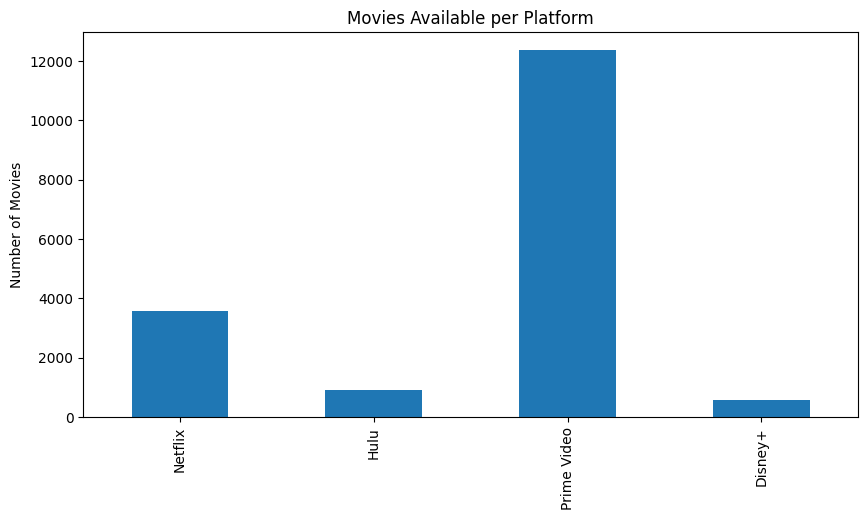

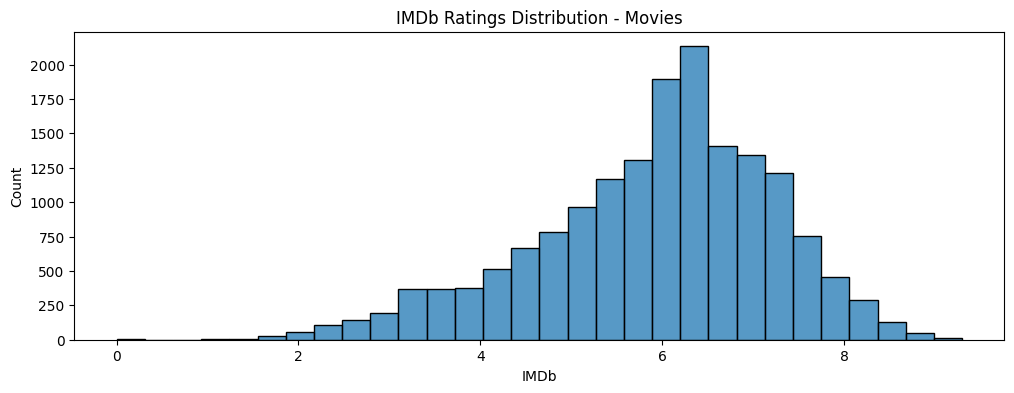

In [ ]:
# Platform distribution with percentages
platform_totals = movies_df[platforms].sum()
platform_percentages = (platform_totals / len(movies_df) * 100).round(2)

fig = px.bar(platform_percentages, 
             title='Movie Distribution Across Platforms',
             labels={'value': 'Percentage of Total Movies', 'index': 'Platform'},
             text=platform_percentages.values)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.show()

# Genre analysis
genres = movies_df['Genres'].str.split(',', expand=True).stack().value_counts()
fig = px.pie(values=genres[:10], names=genres.index[:10], 
             title='Top 10 Movie Genres Distribution')
fig.show()

# Rating trends over years
yearly_ratings = movies_df.groupby('Year')['IMDb'].agg(['mean', 'count']).reset_index()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=yearly_ratings['Year'], y=yearly_ratings['mean'],
                        name="Average Rating"), secondary_y=False)
fig.add_trace(go.Bar(x=yearly_ratings['Year'], y=yearly_ratings['count'],
                     name="Number of Movies"), secondary_y=True)
fig.update_layout(title='Movie Ratings and Volume Trends Over Years')
fig.show()

## 2. Netflix Revenue Analysis

Deep dive into revenue patterns, regional performance, and growth metrics.

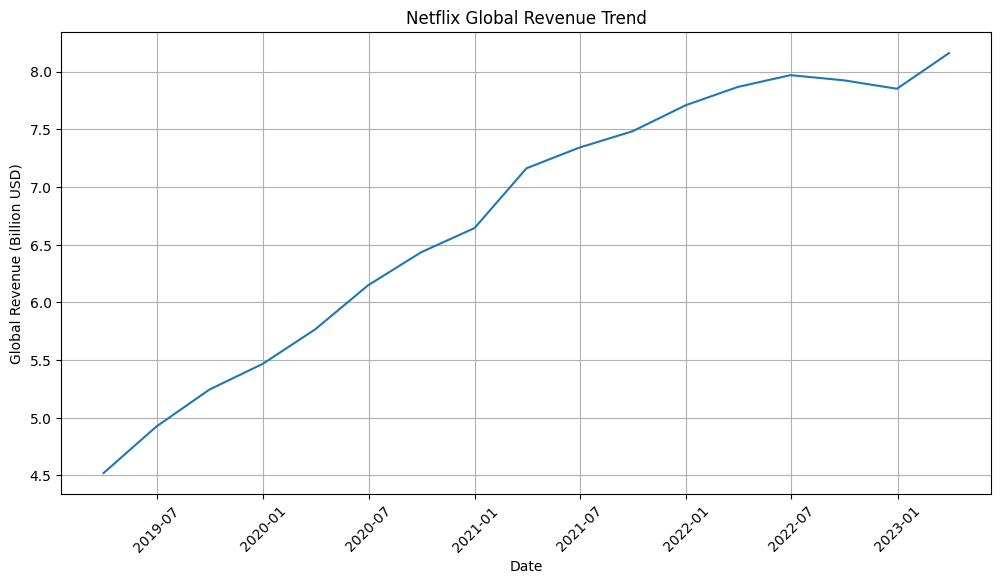

<Figure size 1400x600 with 0 Axes>

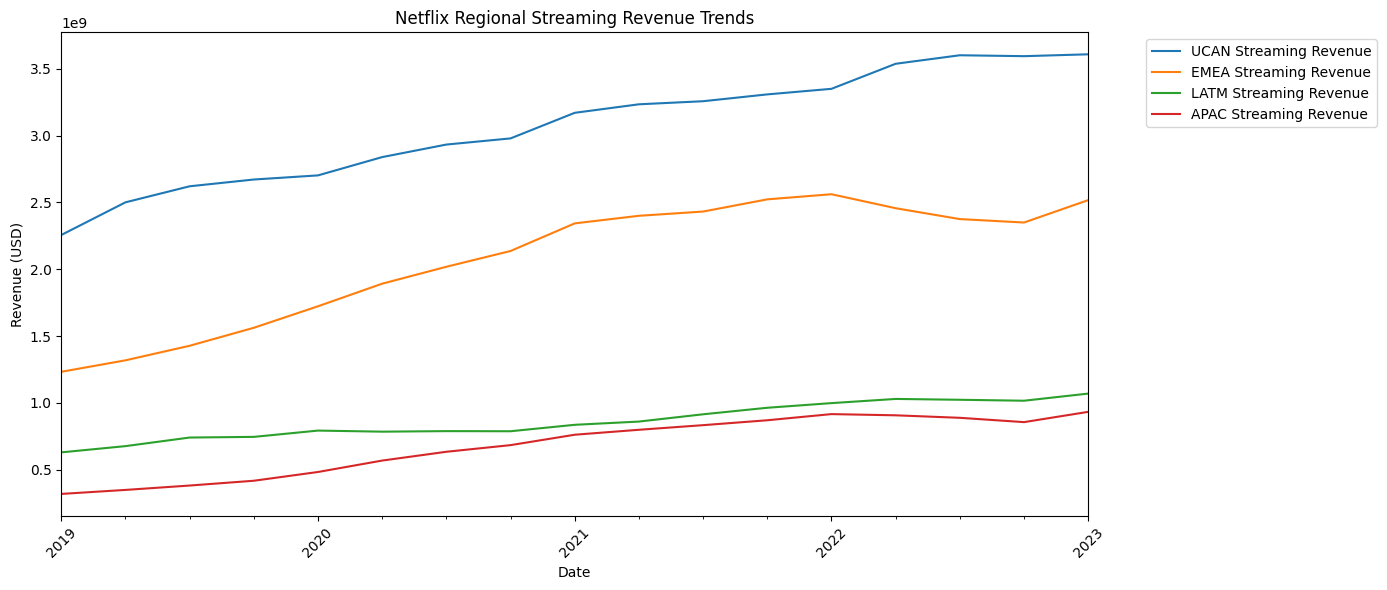

In [ ]:
# Convert Date to datetime
revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])

# Revenue growth analysis
revenue_df['YoY_Growth'] = revenue_df['Global Revenue'].pct_change() * 100
revenue_df['Quarter'] = pd.PeriodIndex(revenue_df['Date'], freq='Q')

# Global revenue and growth trends
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=revenue_df['Date'], y=revenue_df['Global Revenue']/1e9,
                        name="Global Revenue (Billion USD)"), secondary_y=False)
fig.add_trace(go.Bar(x=revenue_df['Date'], y=revenue_df['YoY_Growth'],
                     name="YoY Growth %"), secondary_y=True)
fig.update_layout(title='Netflix Revenue Growth Analysis')
fig.show()

# Regional revenue comparison
regional_cols = ['UCAN Streaming Revenue', 'EMEA Streaming Revenue', 
                'LATM Streaming Revenue', 'APAC Streaming Revenue']
fig = px.area(revenue_df, x='Date', y=regional_cols,
              title='Regional Revenue Contribution Over Time')
fig.show()

# Membership and ARPU analysis
fig = px.scatter(revenue_df, x='Netflix Streaming Memberships', 
                y='Global Revenue', size='UCAN ARPU',
                title='Revenue vs Membership with ARPU Impact')
fig.show()

## 3. TV Shows Analysis

Explore content patterns, ratings distribution, and platform preferences.

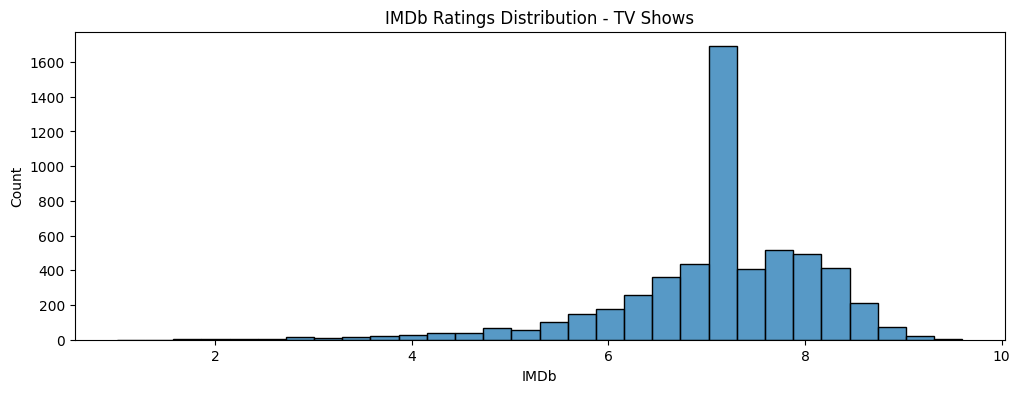

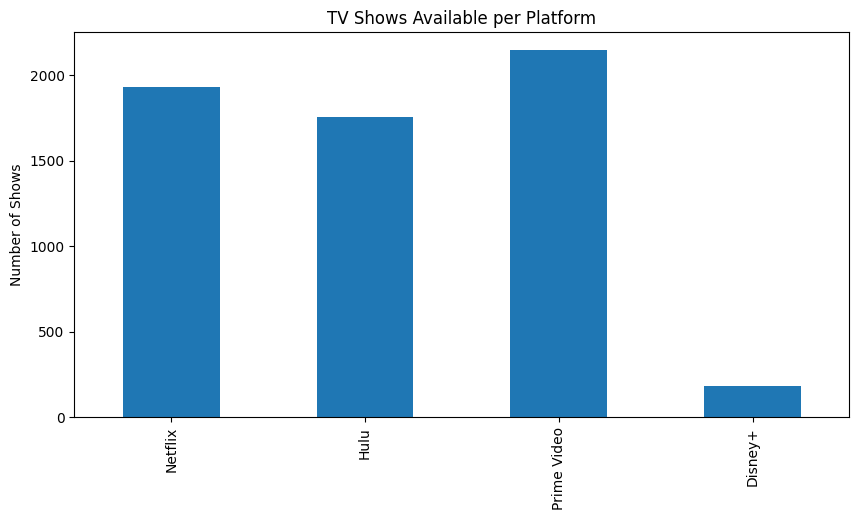

In [ ]:
# Rating distribution by age rating
plt.figure(figsize=(12,6))
sns.boxplot(data=tvshows_df, x='Age', y='IMDb')
plt.title('TV Show Ratings Distribution by Age Category')
plt.xticks(rotation=45)
plt.show()

# Platform preference over time
yearly_platform = tvshows_df.groupby('Year')[platforms].sum()
fig = px.line(yearly_platform, title='Platform Content Growth Over Time')
fig.show()

# Top rated shows
top_shows = tvshows_df.nlargest(10, 'IMDb')[['Title', 'IMDb', 'Year']]
fig = px.bar(top_shows, x='Title', y='IMDb',
             title='Top 10 Rated TV Shows',
             text='IMDb')
fig.update_xaxes(tickangle=45)
fig.show()

## 4. Cross-Dataset Analysis

Compare trends and patterns across movies and TV shows.

<Figure size 800x500 with 0 Axes>

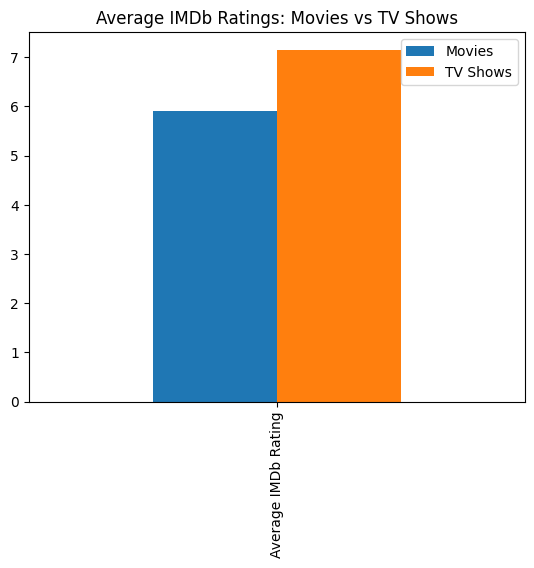

In [ ]:
# Content type comparison
content_comparison = pd.DataFrame({
    'Movies': [len(movies_df), movies_df['IMDb'].mean(), 
               movies_df[platforms].sum().sum()],
    'TV Shows': [len(tvshows_df), tvshows_df['IMDb'].mean(),
                 tvshows_df[platforms].sum().sum()]
}, index=['Total Content', 'Avg Rating', 'Platform Availability'])

fig = px.bar(content_comparison.T, barmode='group',
             title='Movies vs TV Shows Comparison')
fig.show()

# Age rating distribution
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Histogram(x=movies_df['Age'], name='Movies'), row=1, col=1)
fig.add_trace(go.Histogram(x=tvshows_df['Age'], name='TV Shows'), row=1, col=2)
fig.update_layout(title='Age Rating Distribution: Movies vs TV Shows')
fig.show()

# Platform strategy analysis
platform_strategy = pd.DataFrame({
    'Movies': movies_df[platforms].sum() / len(movies_df) * 100,
    'TV Shows': tvshows_df[platforms].sum() / len(tvshows_df) * 100
})
fig = px.bar(platform_strategy, barmode='group',
             title='Platform Content Strategy: Movies vs TV Shows (%)')
fig.show()

## Key Findings Summary

1. Platform Distribution Insights
   - Platform-wise content availability
   - Regional performance metrics
   - Content type preferences

2. Revenue Trends
   - Growth patterns
   - Regional contribution
   - Membership impact

3. Content Analysis
   - Rating patterns
   - Genre preferences
   - Age distribution

4. Strategic Insights
   - Platform content strategy
   - Performance metrics
   - Future growth indicators